Hola Aylin!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders= pd.read_csv('/datasets/instacart_orders.csv',sep=';')
products= pd.read_csv('/datasets/products.csv',sep=';')
aisles= pd.read_csv('/datasets/aisles.csv',sep=';')
dptos= pd.read_csv('/datasets/departments.csv',sep=';')
order_products= pd.read_csv('/datasets/order_products.csv', sep=';')


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo importando las librerías y cargando tus datos en celdas diferentes
</div>

In [3]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [5]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [6]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
products.describe()

,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [11]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
# mostrar información del DataFrame
dptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [13]:
dptos.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [14]:
dptos.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [16]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [17]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la exploración inicial de tus datos. Te recomiendo también agregar `.head()` y `.describe()` para que tengas más conocimiento de los datos que manejarás
</div>

<div class="alert alert-block alert-info">
<b> Claro, lo he agreado en todos los DF's para que sea más visible la información :)
    </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Excelente, buen trabajo aplicando los cambios
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


Los DataFrames; ins_order, products, y order_products, tienen una columna con valores nulos y Order Products por la cantidas de filas que almacena no le es posible tener la información de acuerdo a '.info()' así que se le pone un atributo nuevo.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.


Buscar, encontrar y eliminar los valores duplicados así como más adelante rellenar algunos valores ausentes.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [18]:
# Revisa si hay pedidos duplicados
orders.duplicated().sum()


15

In [19]:
orders[orders.duplicated(keep=False)].sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Sí, son filas completamente idénticas.

In [20]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

orders[((orders['order_dow'] == 3) & (orders['order_hour_of_day']==2))]



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

El miercoles a las 2 hubo algúna falla con el programa ya que justo en este día y hora realizó los 15 duplicados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Realizaste un buen trabajo con los duplicados aplicando el filtro
</div>

In [21]:
# Elimina los pedidos duplicados
orders=orders.drop_duplicates()

In [22]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()


0

In [23]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

De acuerdo a los 15 duplicados del miercoles a las 2am se borró su duplicado y se volvió a comprobar para verificar que no haya ningún duplicado

### `products` data frame

In [24]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()


0

In [25]:
# Revisa únicamente si hay ID de departamentos duplicados
products['department_id'].duplicated().sum()


49673

In [26]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'].str.upper().duplicated().sum()

1361

In [27]:
# Revisa si hay nombres duplicados de productos no faltantes
products[products['product_name'].notna()]['product_name'].str.upper().duplicated().sum()

104

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hay departamentos duplicados ya que cada producto puede estar en el mismo departamento pero no quiere decir que sea el mismo en cuanto características y esto ultimo aplica para los duplicados de 'product_id' y justo en el paso anterior se revisan los productos que tengan valores No nulos por lo que el número se reduce

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Realizaste un buen trabajo con los duplicados
</div>

### `departments` data frame

In [28]:
# Revisa si hay filas totalmente duplicadas

dptos.duplicated().sum()

0

In [29]:
# Revisa únicamente si hay IDs duplicadas de productos
dptos['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este caso está bien que no haya duplicados ya que este DF solo contiene los departamentos unicos que existen en la tienda.

### `aisles` data frame

In [30]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [31]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

También, no hay duplicados (o no debería) porque son solamente los pasillos a los que pertenecen los productos.

### `order_products` data frame

In [32]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [33]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[['order_id', 'product_id']].duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el dataset de `aisles`, `departments`, y `order_products`!
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En combinación de esas dos columnas no debería de haber ningún duplicado ya que no es solo la orden única al realizar un pedido sino es justo la combinación para el producto, y de haberlo, se deberían eliminar ya que sería otra falla en el sistema, en este caso no hay problemas.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [34]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Hay 1258 valores ausentes de acuerdo a la columna 'product_name'

In [35]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products['product_name'].isna()]['aisle_id'].value_counts()

100    1258
Name: aisle_id, dtype: int64

Describe brevemente cuáles son tus hallazgos.

Efectivamentes, todos los valores ausentes son en este pasillo de haber más, se vería reflejado en el resultado al haber usado '.value_counts()'

In [36]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[products['product_name'].isna()]['department_id'].unique()

array([21])

Describe brevemente cuáles son tus hallazgos.

Ningún nombre está relacionado con el pasillo ID 21

In [37]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

Describe brevemente cuáles son tus hallazgos.

En ambos casos el ID de ese departamento y ese pasillo no está asignado a nada 

In [38]:
dptos[dptos['department_id']==21]

,department_id,department
20,21,missing


In [39]:
aisles[aisles['aisle_id']== 100]

,aisle_id,aisle
99,100,missing


In [40]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

In [41]:
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Usando fillna se reemplazaron los valores ausentes y como comprobación puse una línea mas para obtener valores ausentes si hubieran de acuerdo a 'product_name'

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Encontraste los valores ausentes y llegaste a las conclusiones adecuadas
</div>

### `orders` data frame

In [42]:
# Encuentra los valores ausentes
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [43]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[orders['order_number'] == 1]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [44]:
orders[orders['order_number'] >=2].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Realmente no hay que reemplazar valores ya que se trata de valores que eventualmente se actualizarán porque aún no se han realizado pedidos por parte del cliente así que sí, esos valores NaN están relacionados al primer pedido del cliente

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Encontraste los valores ausentes analizaste de forma correcta respecto a si son en la primer orden
</div>

### `order_products` data frame

In [45]:
# Encuentra los valores ausentes
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [46]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products['add_to_cart_order'].min()

1.0

In [47]:
order_products['add_to_cart_order'].max()

64.0

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo del valor máximo y mínimo
</div>

Describe brevemente cuáles son tus hallazgos.

De acuerdo a los resultados parece que el máximo de productos agregados son 64 pero hay que comprobarlo.

In [48]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orders_id_nan = order_products[order_products['add_to_cart_order'].isna()]['order_id']

In [49]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


In [50]:
prod_per_order =order_products[order_products['order_id'].isin(orders_id_nan)]


In [51]:
size = (prod_per_order.groupby('order_id').size())

In [52]:
size.min()

65

Describe brevemente cuáles son tus hallazgos.

De acuerdo a las líneas de código creadas hallé que todas esas órdenes tienen más de 64 productos, el sistema por alguna razón falla y no hace el registro completo

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo filtrando por las ordenes con valores ausentes y analizando si tienen más de 64 productos
</div>

In [53]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Ocupar fillna para realizar el reemplazo de valores ausentes y convertirlo a un entero 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

En un general, se eliminaron filas completamente duplicadas y se rellenaron valores ausentes con elementos que se puedan reconocer así no sea yo directamente la que vea la info sepa de qué se trata. Ya en esta ultima parte se hizo un análisis a fondo sobre los productos con valores ausentes a qué estaban relacionados exactamente, no solo asumir que eran 64 el máximo, y también era obligatorio indagar más puesto que son muchos más datos y sería imposible revisar uno por uno o por secciones. 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [54]:
orders.groupby('order_hour_of_day').count()

,order_id,user_id,order_number,order_dow,days_since_prior_order
order_hour_of_day,,,,,
0,3180,3180,3180,3180,2963
1,1763,1763,1763,1763,1673
2,989,989,989,989,928
3,770,770,770,770,719
4,765,765,765,765,711
5,1371,1371,1371,1371,1282
6,4215,4215,4215,4215,3997
7,13043,13043,13043,13043,12402
8,25024,25024,25024,25024,23717


In [55]:
orders.groupby('order_dow').count()

,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order
order_dow,,,,,
0,84090,84090,84090,84090,78749
1,82185,82185,82185,82185,77269
2,65833,65833,65833,65833,61925
3,60897,60897,60897,60897,57271
4,59810,59810,59810,59810,56395
5,63488,63488,63488,63488,59907
6,62649,62649,62649,62649,58619


Ambos valores son sensibles ya que consideran el rango de tiempo adecuado

In [56]:
unique_order_dow =orders['order_dow'].unique()
sorted_unique_order_dow = sorted(unique_order_dow)
sorted_unique_order_dow

[0, 1, 2, 3, 4, 5, 6]

In [57]:
unique_order_hday= orders['order_hour_of_day'].unique()
sorted_unique_order_hday= sorted (unique_order_hday)
sorted_unique_order_hday

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo! Otra forma con la que podrías determinar es aplicando `.unique()` y te devolverá una lista de los valores únicos en esa columna
</div>

<div class="alert alert-block alert-info">
<b>Gracias, aumenté líneas que dan el mismo resultado pero con .unique() para ver la otra forma de llegar al resultado</b> <a class=“tocSkip”></a>
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:xlabel='order_hour_of_day'>

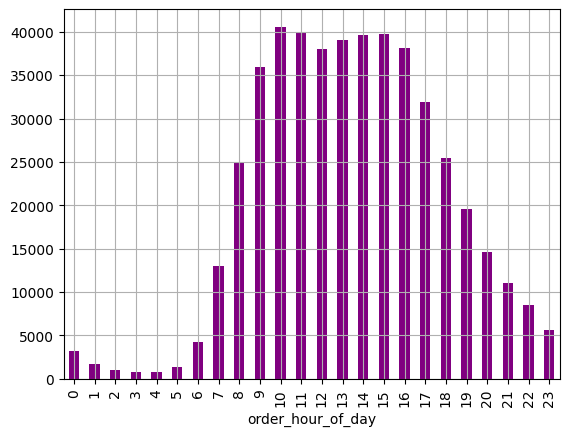

In [58]:
orders.groupby('order_hour_of_day')['order_id'].count().plot(kind='bar', color= 'purple', grid= True)

De las 9 a las 16 horas es cuando más las personas realizan pedidos 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho y con una conclusión acertada!
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:xlabel='order_dow'>

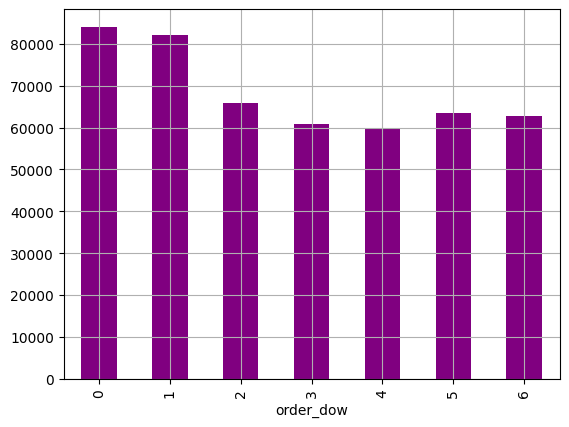

In [59]:
orders.groupby('order_dow')['order_id'].count().plot(kind='bar', color= 'purple', grid= True)

Las personas suelen realizar sus compras el día domingo y lunes, pero durante la semana se mantienen numeros estables 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho y con una conclusión acertada!
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:xlabel='days_since_prior_order'>

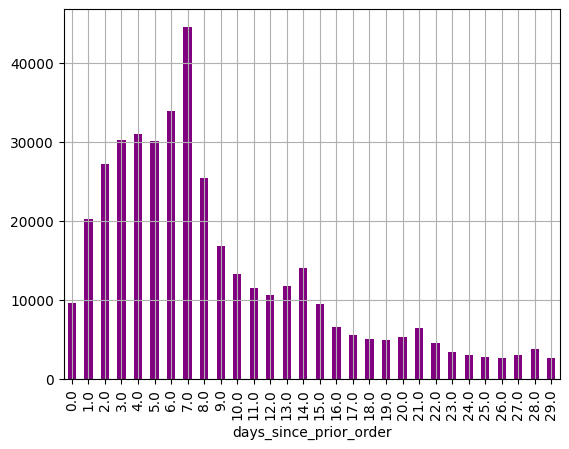

In [60]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.order
filtered_orders = orders[orders['days_since_prior_order'] < 30]
filtered_orders.groupby('days_since_prior_order')['order_id'].count().plot(kind='bar', color= 'purple', grid=True)

Seguro que hay personas que piden más allá de los 30 días pero como ya no se considera relevante según los datos, se decidió que cualquier orden más allá de 30 días transcurridos se coloca en este día.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo y buena conclusión, pero ¿No te parece que el valor en los 30 días es muy alto? Esto podría tratarse de un error generar los datos por lo que te recomendaría quitarlo para no distorcinar tu gráfica
</div>

<div class="alert alert-block alert-info">
<b>Cierto, ya de esta forma se obtiene ua gráfica que se podría presentar y se entiende mejor </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Me alegro que lo hayas entendido, buen trabajo!
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

<AxesSubplot:xlabel='order_hour_of_day'>

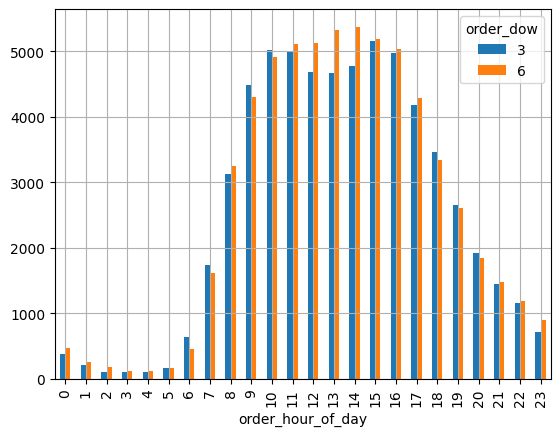

In [61]:
(
    orders
    .query('(order_dow == 6) or (order_dow== 3)')
    .pivot_table(index='order_hour_of_day', columns='order_dow', values='order_id', aggfunc='count')
    .plot(kind='bar', grid=True)
)

En miércoles 9, 10, 15 y 16horas y a la par el sábado 11-16horas, son sus horas más fuertes de pedidos pero el sábado es el día en que más se realizan 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<AxesSubplot:ylabel='Frequency'>

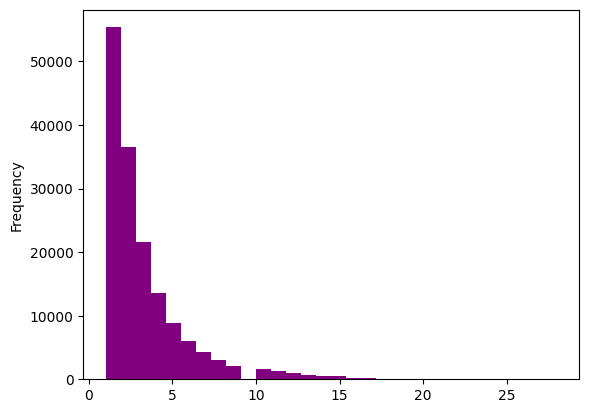

In [62]:
orders.groupby('user_id')['order_id'].count().plot(kind='hist', color= 'purple', bins=30)

Lo usual es que los usuarios realizan 1-2 pedidos y de ahí van disminuyendo los usuarios que realizan varios pedidos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con las visualizaciones, cada una bastante clara y con una conclusión acertada!
</div>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [63]:
order_prod_named = pd.merge(
    order_products, 
    products,
    on= 'product_id'

)
order_prod_named.sample(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
2195657,1030175,2452,6,1,Naturals Chicken Nuggets,129,1
3585195,2019870,877,7,1,Ultra-Filtered Whole Milk,84,16
3317056,3282875,22594,5,0,Quattro Formaggi Four Cheeses Pizza,13,20
1107150,43755,19660,1,1,Spring Water,115,7
3950307,338364,32931,25,1,Egg Challah Rolls,43,3
282185,948449,8277,1,1,Apple Honeycrisp Organic,24,4
153149,2772123,21903,4,1,Organic Baby Spinach,123,4
2431717,2829224,14715,1,1,Coconut Water,98,7
33727,1179481,10017,4,1,Tilapia Filet,39,12
2269320,619034,23734,4,1,Sour Cream,108,16


In [64]:
top_20_products = order_prod_named.groupby(['product_id', 'product_name'])['order_id'].count().reset_index(name='total_orders')
top_20_products = top_20_products.sort_values(by='total_orders', ascending=False)
top_20_products.head(20)

,product_id,product_name,total_orders
22808,24852,Banana,66050
12025,13176,Bag of Organic Bananas,53297
19370,21137,Organic Strawberries,37039
20077,21903,Organic Baby Spinach,33971
43271,47209,Organic Hass Avocado,29773
43788,47766,Organic Avocado,24689
43663,47626,Large Lemon,21495
15364,16797,Strawberries,20018
24047,26209,Limes,19690
25556,27845,Organic Whole Milk,19600


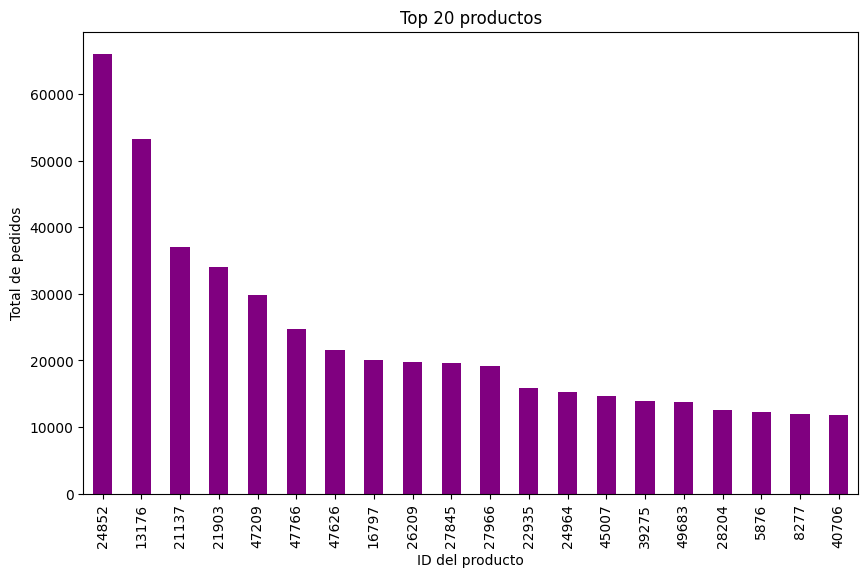

In [65]:
top_20_products= top_20_products.head(20)
top_20_products.plot(kind='bar', x='product_id', y='total_orders', color='purple', legend=False, figsize=(10, 6))
plt.ylabel('Total de pedidos')
plt.xlabel('ID del producto')
plt.title('Top 20 productos')
plt.show()

Se necesitó unir dos DF's para poder realizar este paso y en base a sus coincidencias de product_id, se trabajó en el siguiente paso con lo necesario, se creo una nueva columna para poder visualizar el recuento de pedidos de cada producto y se concluye que los plátanos son el producto más pedido.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo buscando los productos más vendidos! Te recomendaría agregar una gráfica de barras donde se vea el nombre del producto y ID para poder compararlo de manera más visual.
</div>

<div class="alert alert-block alert-info">
<b> Gracias, por cierto, para este caso sería más atractivo si pusiera la gráfica de barras del ID de produsto más pedido hasta arriba y de manera descendente (en el eje Y)? Lo vi en un ejemplo, pero tuve dudas. </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios! Realmente en este caso podías escoger el orden que consideres mejor siempre y cuando sigan un orden ya sea de izquierda a derecha o viceversa. Por otro lado, si la gráfica fuese relacionado con algo respecto al tiempo cómo por ejemplo con los años en el eje X y el último año tiene la barra más grande te conviene mostrar esa barra al lado derecho porque estaríamos mostrando un crecimiento a través del tiempo.
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<AxesSubplot:ylabel='Frequency'>

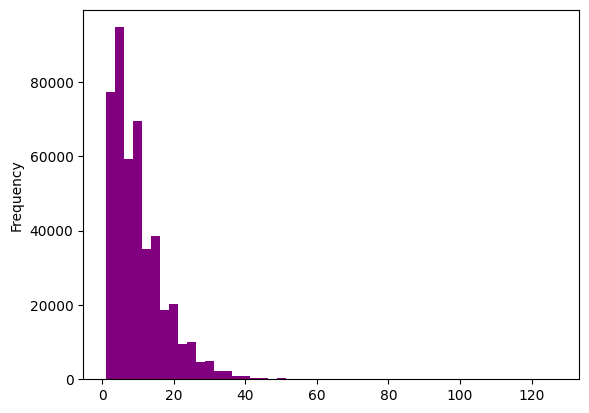

In [66]:
order_products.groupby('order_id')['product_id'].count().plot(kind='hist', color='purple', bins= 50)

Usualmente se suelen pedir 2 productos en cada orden.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la visualización y conclusión!
</div>

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [67]:
freq_prod =order_prod_named.groupby(['product_id', 'product_name'])['reordered'].sum()
freq_prod= freq_prod.sort_values(ascending=False).head(20)
freq_prod

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: reordered, dtype: int64

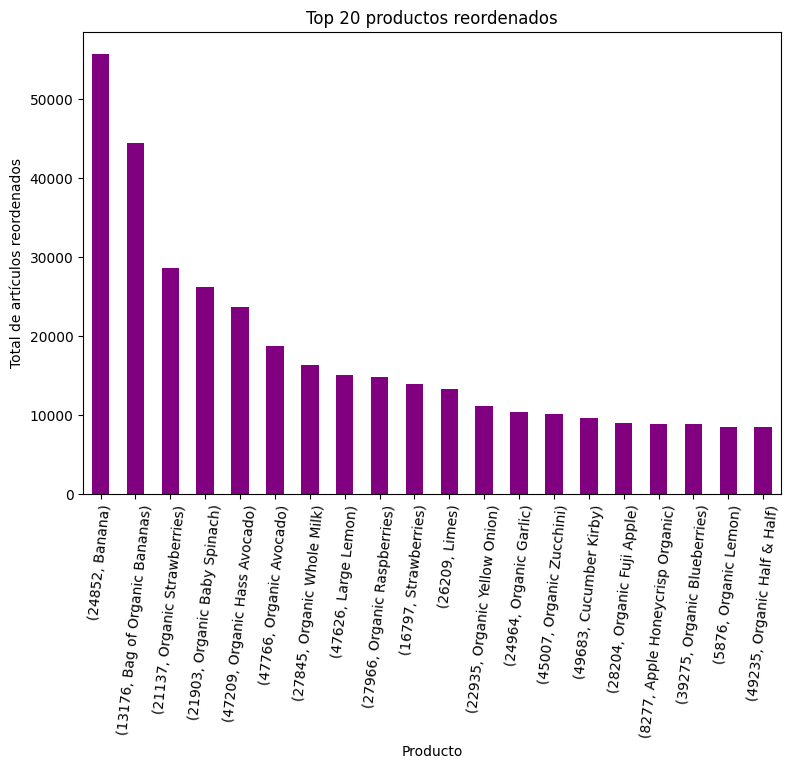

In [68]:
freq_prod = freq_prod.head(20)
freq_prod.plot(kind='bar', x='product_id', y='freq_prod', rot=84, color='purple', legend=False, figsize=(9, 6))
plt.ylabel('Total de artículos reordenados')
plt.xlabel('Producto')
plt.title('Top 20 productos reordenados')
plt.show()

Se puede apreciar en la tabla que los plátanos son el producto que indiscutiblemente se vuelve a reordenar y en general frutas y verduras.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo calculando los productos que se piden con más frecuencia. Cómo recomendación siempre que tengas este tipo de ejercicios donde se necesita hacer un conteo y luego una comparación puedes incluir una gráfica de barras.
</div>

<div class="alert alert-block alert-info">
<b> Perfecto, la información se aprecia y se transmite de mejor forma. Gracias </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

No hay de que! Buen trabajo
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [69]:
normal_order= order_prod_named[order_prod_named['reordered'] == 0].groupby('product_id').size()

In [70]:
reordered = order_prod_named[order_prod_named['reordered'] == 1].groupby('product_id').size()

In [71]:
prop_reordered= reordered / (normal_order + reordered)
prop_reordered

product_id
1        0.564286
2             NaN
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Length: 45573, dtype: float64

Este es el promedio de las veces que se piden los productos de nuevo y justo aqui podemos visualizar que el prod con ID 2 solo ha sido comprado de manera única mientras que (al menos los que se pueden visualizar) los demás han sido reordenados en varias ocasiones.

In [72]:
order_prod_named['reordered'].mean()

0.5905025008762362

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo! También podrías aplicar `.mean()` a la columna reordered puesto que al ser valores de 1 y 0, si tienes 5 valores con 1 y 5 con 0, al sacar la media obtendrás 0.5 cómo la proporción lo cual es lo correcto ya que la mitad de las veces se volvió a reordenar en este ejemplo.
</div>

<div class="alert alert-block alert-info">
<b> Vale, entonces para esta respuesta ¿se necesitaba un número global y con esa línea bastaba? Gracias, si entendí tu punto :)</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Quizá no me hice entender bien, una disculpa, el `.mean()` podías aplicarlo luego de hacer la agrupación por `product_id` cómo lo hiciste donde aplicaste `.size()` solo que sería una sola línea con la agrupación y obtendrías el mismo resultado que en tu variable `prop_reordered`
</div>

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [73]:
prop_clients = pd.merge(
    orders, 
    order_products,
    
)
prop_clients.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048,1,1
1,1515936,183418,11,6,13,30.0,47766,3,1
2,1515936,183418,11,6,13,30.0,45066,9,0
3,1515936,183418,11,6,13,30.0,24082,11,0
4,1515936,183418,11,6,13,30.0,24363,4,0


In [74]:
prop_clients.groupby('user_id')['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Se puede apreciar a groso modo, que los últimos usuarios suelen pedir más los productos que ya habían pedido con anterioridad 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la uníon de los datasets y el cálculo de la proporción
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [80]:
prod= order_products[order_products['add_to_cart_order']==1]
prod_counts= prod.groupby('product_id')['order_id'].count().sort_values(ascending=False)
prod_counts.head(20)

product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
43352     1246
Name: order_id, dtype: int64

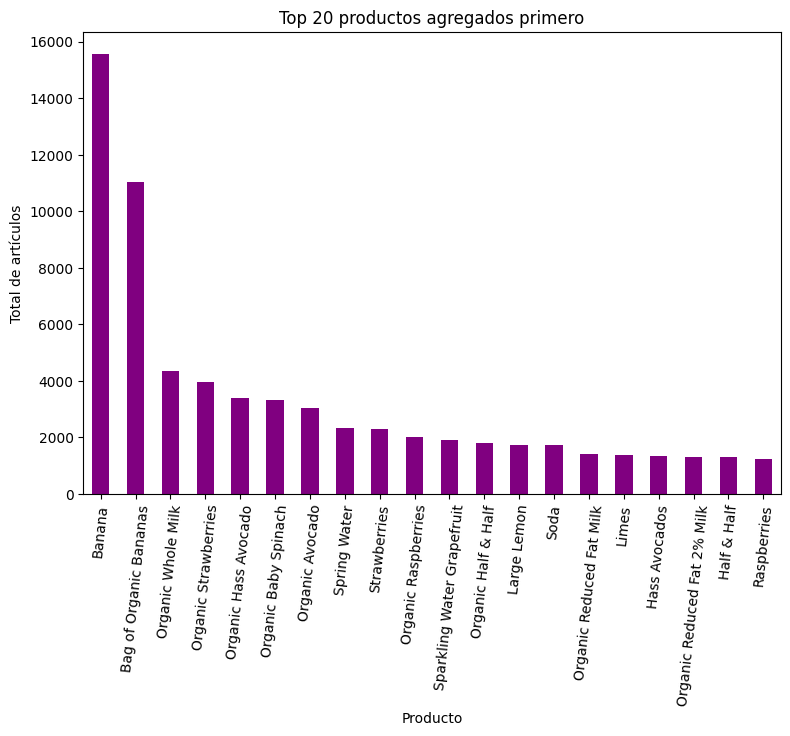

In [92]:
prod_counts= prod.groupby('product_id')['order_id'].count().sort_values(ascending=False)
prod_counts = prod_counts.head(20)

#Esta linea fue la que investigué 
prod_counts = prod_counts.reset_index()

# Para saber qué columna tiene la info y no se confunda
prod_counts.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Hice un merge para acceder a los nombres de los productos
prod_counts = prod_counts.merge(products, on='product_id', how='left')

prod_counts.plot(kind='bar',x='product_name', y='total_orders', color='purple', figsize=(9, 6), legend=False)
plt.ylabel('Total de artículos')
plt.xlabel('Producto')
plt.title('Top 20 productos agregados primero')
plt.xticks(rotation=84)
plt.show()

Aquí estamos mostrando los primeros 20 articulos que se añadieron al carrito, no sabemos su nombre pero sabemos su ID.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1era Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo y conclusión! También podrías incluir una gráfica de barras donde muestre nombre y ID para mejorar la comprensión del análisis.
</div>

<div class="alert alert-block alert-info">
<b> Perfecto, en este paso como se hizo un filtro antes y necesitaba el nombre del producto pero al mismo tiempo estab trabajando con un Series sí pedí ayuda y también en el cambio de nombre de la columna ya que no comprendía porque se tenía que hacer. Gracias</b> <a class=“tocSkip”></a>
</div>

### Conclusion general del proyecto:

Este proyecto ya es más acercado a la realidad de lo que veremos en un entorno de trabajo, por lo que se requiere trabajar con más de un archivo, los cuales trabajan en conjunto para dar info sobre un proceso completo.

Como primer paso rápido es importante comprobar valores NaN, trabajar sobre las filas completamente duplicadas y e eliminaron para tener los datos necesarios para realizar los siguiente pasos. También, fue importante darse cuenta que puede haber fallas en el sistema y eso crea datos duplicados. Realizar también el llenado de lso valores ausentes fue importante para poder visualizar de manera fácil dónde se encontraban. Se trabajo DF por DF para obtener info sobre ciertos errores basado en la información previa.
En la parte final, ya con los datos limpios se pueden realizar las gráficas pertinentes sobre todo para obtener info sobre los pedidos, los productos populares basados en las órdenes, en los clientes y así dar la info sobre qué conviene tener más en stock y por ejemplo sobre qué productos tener más en promoción o cuales descartar por completo ya que su consumo es muy bajo.


<div class="alert alert-block alert-info">
<b>Comentario final (1ra Revision)</b> <a class=“tocSkip”></a>
    

Hiciste un buen trabajo Aylin! Redactaste muy buenas conclusiones a partir de las gráficas resultantes y el análisis en general, se nota tu conocimiento de las herramientas de manejo de datos cómo lo es pandas y la interpretación de los resultados.
    
    
Te felicito por el trabajo realizado, realmente son pocos los puntos a cambiar para que tu proyecto esté completo, estoy seguro que en tu siguiente iteración lo habrás logrado.
    

Te he ido dejando mis comentarios y recomendacioens sobre algunos puntos que espero te sirvan para tu siguiente iteracion y tus próximos proyectos.
    
Un saludo!
</div>

<div class="alert alert-block alert-success">
<b>Comentario final (2da Revision)</b> <a class=“tocSkip”></a>
    

Muy buen trabajo con los cambios Aylin! Dejaste mucho más pulido tu proyecto, te felicito. Te he dejado algunos comentarios resolviendo algunas de las dudas que habías planteado, espero se entienda y te sirva en tus próximos proyectos. Pero en sí, tu proyecto ya estaría completo.
    
Un saludo!
</div>